# Example(Dimensionality Reduction II)

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Data/Iris/Iris-cleaned.csv')
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
df['species'] = df.species.astype('category')
df['species code'] = df.species.cat.codes
df.head(3)

,sepal length,sepal width,petal length,petal width,species,species code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


In [4]:
# K-Means clustering
attributes2 = df[['sepal length','sepal width']]
labels_kmeans = KMeans(n_clusters=3).fit_predict(attributes2)
df['kmeans code'] = labels_kmeans
df.head(3)

,sepal length,sepal width,petal length,petal width,species,species code,kmeans code
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1


In [5]:
km = KMeans(n_clusters=3)
km.fit(attributes2)
labels_kmeans = km.predict(attributes2)
labels_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [6]:
colors = np.array(['blue','green','red'])
df['species color'] = colors[df['species code']]
df['kmeans color'] = colors[df['kmeans code']]
df.head(3)

,sepal length,sepal width,petal length,petal width,species,species code,kmeans code,species color,kmeans color
0,5.1,3.5,1.4,0.2,setosa,0,1,blue,green
1,4.9,3.0,1.4,0.2,setosa,0,1,blue,green
2,4.7,3.2,1.3,0.2,setosa,0,1,blue,green


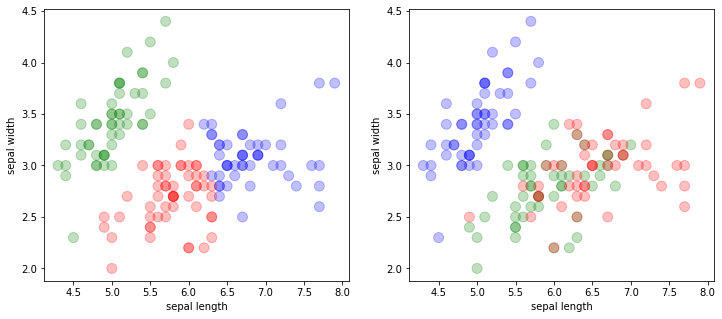

In [7]:
plot1 = df.plot.scatter(x='sepal length', y = 'sepal width', 
                        c = df['kmeans color'].values,
                        s=100,
                        alpha=0.25,
                        ax = plt.subplot(121),
                        figsize = (12,5))
plot2 = df.plot.scatter(x='sepal length', y = 'sepal width', 
                        c = df['species color'].values,
                        s=100,
                        alpha=0.25,
                        ax = plt.subplot(122),
                        figsize = (12,5))

In [8]:
attributes4 = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
attributes4.head(3)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
labels_kmeans = KMeans(n_clusters=3).fit_predict(attributes4)
df['kmeans code'] = labels_kmeans
df.head(3)

,sepal length,sepal width,petal length,petal width,species,species code,kmeans code,species color,kmeans color
0,5.1,3.5,1.4,0.2,setosa,0,1,blue,green
1,4.9,3.0,1.4,0.2,setosa,0,1,blue,green
2,4.7,3.2,1.3,0.2,setosa,0,1,blue,green


In [10]:
colors = np.array(['blue','green','red'])
df['species color'] = colors[df['species code']]
df['kmeans color'] = colors[df['kmeans code']]
df.head(3)

,sepal length,sepal width,petal length,petal width,species,species code,kmeans code,species color,kmeans color
0,5.1,3.5,1.4,0.2,setosa,0,1,blue,green
1,4.9,3.0,1.4,0.2,setosa,0,1,blue,green
2,4.7,3.2,1.3,0.2,setosa,0,1,blue,green


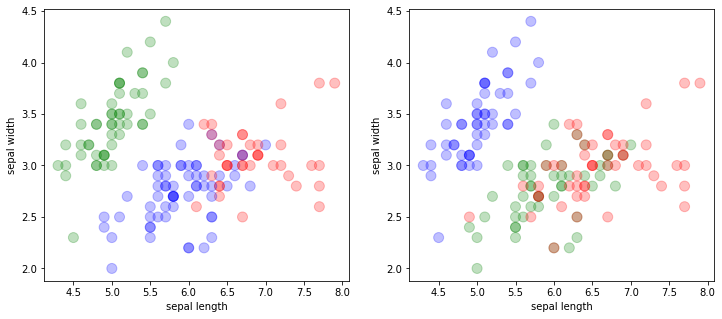

In [11]:
plot1 = df.plot.scatter(x='sepal length', y = 'sepal width', 
                        c = df['kmeans color'].values,
                        s=100,
                        alpha=0.25,
                        ax = plt.subplot(121),
                        figsize = (12,5))
plot2 = df.plot.scatter(x='sepal length', y = 'sepal width', 
                        c = df['species color'].values,
                        s=100,
                        alpha=0.25,
                        ax = plt.subplot(122),
                        figsize = (12,5))

In [12]:
svd = TruncatedSVD(n_components = 2) #can only visualize 2
attributes4_reduced2 = svd.fit_transform(attributes4)
df['P1'] = attributes4_reduced2[:,0] #principal component #1
df['P2'] = attributes4_reduced2[:,1]
svd.explained_variance_ratio_.round(3)

array([0.53 , 0.447])

In [14]:
(1-svd.explained_variance_ratio_.sum()).round(3)
#only 2 percent is left out(missing)

0.023

In [15]:
df.head(3)

,sepal length,sepal width,petal length,petal width,species,species code,kmeans code,species color,kmeans color,P1,P2
0,5.1,3.5,1.4,0.2,setosa,0,1,blue,green,5.912204,2.303442
1,4.9,3.0,1.4,0.2,setosa,0,1,blue,green,5.572076,1.973831
2,4.7,3.2,1.3,0.2,setosa,0,1,blue,green,5.446485,2.096533


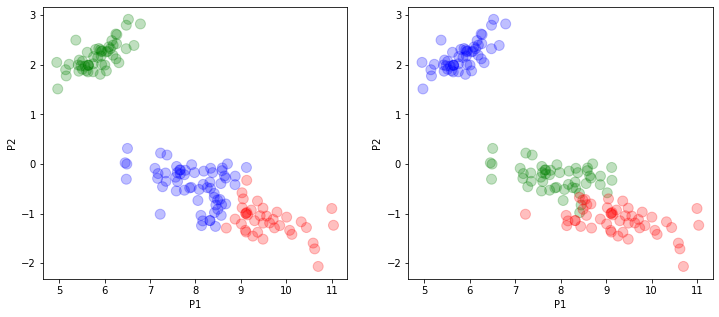

In [16]:
plot1 = df.plot.scatter(x='P1', y = 'P2', 
                        c = df['kmeans color'].values,
                        s=100,
                        alpha=0.25,
                        ax = plt.subplot(121),
                        figsize = (12,5))
plot2 = df.plot.scatter(x='P1', y = 'P2', 
                        c = df['species color'].values,
                        s=100,
                        alpha=0.25,
                        ax = plt.subplot(122),
                        figsize = (12,5))
#much much better
#if 3D/4D to 2D->there will be some overlap